In [1]:
from PIL import Image


Image Steganography 
1. Encode the data 
2. Decode the data 
 Select the option: 1

Encoding...
Enter image name (with extension): python.png
The shape of the image is:  (169, 298, 3)


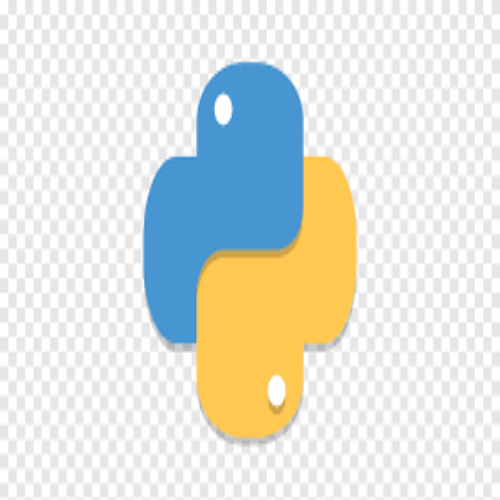

Enter data to be encoded: hii
Enter the name of the new encoded image (with extension): new1.png
Maximum Bytes for encoding: 18885


In [2]:
import cv2
import numpy as np
from IPython.display import display

# converting types to binary
def msg_to_bin(msg):
    if isinstance(msg, str):
        return ''.join(format(ord(i), "08b") for i in msg)
    elif isinstance(msg, bytes) or isinstance(msg, np.ndarray):
        return [format(i, "08b") for i in msg]
    elif isinstance(msg, int) or isinstance(msg, np.uint8):
        return format(msg, "08b")
    else:
        raise TypeError("Input type not supported")

# defining function to hide the secret message into the image
def hide_data(img, secret_msg):
    nBytes = img.shape[0] * img.shape[1] * 3 // 8
    print("Maximum Bytes for encoding:", nBytes)
    if len(secret_msg) > nBytes:
        raise ValueError("Error encountered insufficient bytes, need bigger image or less data!!")
    secret_msg += '#####'
    dataIndex = 0
    bin_secret_msg = msg_to_bin(secret_msg)

    dataLen = len(bin_secret_msg)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(3):
                if dataIndex < dataLen:
                    img[i][j][k] = int(bin(img[i][j][k])[:-1] + bin_secret_msg[dataIndex], 2)
                    dataIndex += 1
                if dataIndex >= dataLen:
                    break
            if dataIndex >= dataLen:
                break
        if dataIndex >= dataLen:
            break

    return img

def show_data(img):
    bin_data = ""
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(3):
                bin_data += bin(img[i][j][k])[-1]
    allBytes = [bin_data[i: i + 8] for i in range(0, len(bin_data), 8)]
    decodedData = ""
    for bytes in allBytes:
        decodedData += chr(int(bytes, 2))
        if decodedData[-5:] == "#####":
            break
    return decodedData[:-5]

def encodeText():
    img_name = input("Enter image name (with extension): ")
    img = cv2.imread(img_name)

    print("The shape of the image is: ", img.shape)
    resizedImg = cv2.resize(img, (500, 500))
    display(Image.fromarray(cv2.cvtColor(resizedImg, cv2.COLOR_BGR2RGB)))

    data = input("Enter data to be encoded: ")
    if len(data) == 0:
        raise ValueError('Data is Empty')

    file_name = input("Enter the name of the new encoded image (with extension): ")
    encodedImage = hide_data(img, data)
    cv2.imwrite(file_name, encodedImage)

def decodeText():
    img_name = input("Enter the name of the Steganographic image that has to be decoded (with extension): ")
    img = cv2.imread(img_name)

    print("The Steganographic image is as follows: ")
    resizedImg = cv2.resize(img, (500, 500))
    display(Image.fromarray(cv2.cvtColor(resizedImg, cv2.COLOR_BGR2RGB)))

    text = show_data(img)
    return text

def steganography():
    n = int(input("Image Steganography \n1. Encode the data \n2. Decode the data \n Select the option: "))
    if n == 1:
        print("\nEncoding...")
        encodeText()
    elif n == 2:
        print("\nDecoding...")
        print("Decoded message is: " + decodeText())
    else:
        raise Exception("Inserted value is incorrect!")

steganography() # encoding the image


Image Steganography 
1. Encode the data 
2. Decode the data 
 Select the option: 2

Decoding...
Enter the name of the Steganographic image that has to be decoded (with extension): new1.png
The Steganographic image is as follows: 


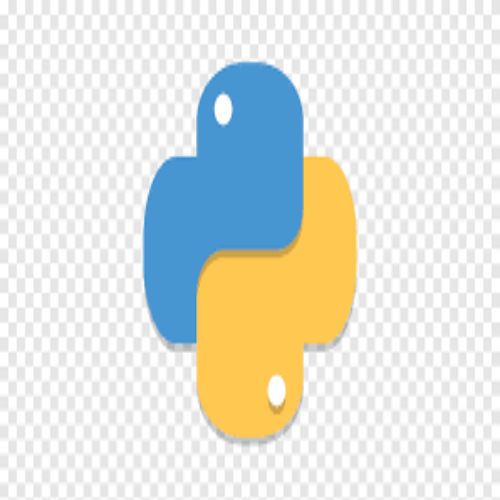

Decoded message is: hii


In [3]:
import cv2
import numpy as np
from IPython.display import display

# converting types to binary
def msg_to_bin(msg):
    if isinstance(msg, str):
        return ''.join(format(ord(i), "08b") for i in msg)
    elif isinstance(msg, bytes) or isinstance(msg, np.ndarray):
        return [format(i, "08b") for i in msg]
    elif isinstance(msg, int) or isinstance(msg, np.uint8):
        return format(msg, "08b")
    else:
        raise TypeError("Input type not supported")

# defining function to hide the secret message into the image
def hide_data(img, secret_msg):
    nBytes = img.shape[0] * img.shape[1] * 3 // 8
    print("Maximum Bytes for encoding:", nBytes)
    if len(secret_msg) > nBytes:
        raise ValueError("Error encountered insufficient bytes, need bigger image or less data!!")
    secret_msg += '#####'
    dataIndex = 0
    bin_secret_msg = msg_to_bin(secret_msg)

    dataLen = len(bin_secret_msg)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(3):
                if dataIndex < dataLen:
                    img[i][j][k] = int(bin(img[i][j][k])[:-1] + bin_secret_msg[dataIndex], 2)
                    dataIndex += 1
                if dataIndex >= dataLen:
                    break
            if dataIndex >= dataLen:
                break
        if dataIndex >= dataLen:
            break

    return img

def show_data(img):
    bin_data = ""
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(3):
                bin_data += bin(img[i][j][k])[-1]
    allBytes = [bin_data[i: i + 8] for i in range(0, len(bin_data), 8)]
    decodedData = ""
    for bytes in allBytes:
        decodedData += chr(int(bytes, 2))
        if decodedData[-5:] == "#####":
            break
    return decodedData[:-5]

def encodeText():
    img_name = input("Enter image name (with extension): ")
    img = cv2.imread(img_name)

    print("The shape of the image is: ", img.shape)
    resizedImg = cv2.resize(img, (500, 500))
    display(Image.fromarray(cv2.cvtColor(resizedImg, cv2.COLOR_BGR2RGB)))

    data = input("Enter data to be encoded: ")
    if len(data) == 0:
        raise ValueError('Data is Empty')

    file_name = input("Enter the name of the new encoded image (with extension): ")
    encodedImage = hide_data(img, data)
    cv2.imwrite(file_name, encodedImage)

def decodeText():
    img_name = input("Enter the name of the Steganographic image that has to be decoded (with extension): ")
    img = cv2.imread(img_name)

    print("The Steganographic image is as follows: ")
    resizedImg = cv2.resize(img, (500, 500))
    display(Image.fromarray(cv2.cvtColor(resizedImg, cv2.COLOR_BGR2RGB)))

    text = show_data(img)
    return text

def steganography():
    n = int(input("Image Steganography \n1. Encode the data \n2. Decode the data \n Select the option: "))
    if n == 1:
        print("\nEncoding...")
        encodeText()
    elif n == 2:
        print("\nDecoding...")
        print("Decoded message is: " + decodeText())
    else:
        raise Exception("Inserted value is incorrect!")

steganography() # encoding the image
